## Credit Card Fraud Detection

In this project we will predict the fraudulent credit card transactions with the help of Machine Learning Models.

In [1]:
#importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from scipy import stats
from sklearn import preprocessing
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import math
init_notebook_mode(connected=True)

### Data Preparation and Understanding

In [2]:
#code to display all the columns of our data frame
pd.set_option('display.max_columns', None)

In [3]:
#reading the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#observing the different types of features in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

we can observe here that there are 28 variables V1 to V28 which are transformed variables which are of the type float. The only non transformed variables that we can work with are:

1. Time - Type Float
2. Amount - Type Float
3. Class - Type Int
Also, there are no missing values in our dataset.

Here we will observe the distribution of our classes

In [5]:
# Looking into descriptive statistics of the time and amount fields in our data
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


1. We have credit card transactions happening very 94813.86 seconds on an average
2. The average transcation amount is 88.35 with a minimum of 0 and maximum of 25691. This looks like the amount column is positively skewed.

In [6]:
#changing the column names to lower case of our dataframe so that it will be easier
df.columns = map(str.lower, df.columns)

In [7]:
#checking the top 5 rows of our dataframe
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Every column is now in the lower case format

In [8]:
# Confirming that there are no missing vakues in our dataset
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,class,v14,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v15,amount,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are no missing values in our dataset.

In [9]:
classes=df['class'].value_counts()
normal_share=classes[0]/df['class'].count()*100
fraud_share=classes[1]/df['class'].count()*100

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
class_df = pd.DataFrame({'Class' : classes.index, 'Values' : classes.values})
fig = go.Figure(data=[go.Bar(
            x=class_df['Class'], y=class_df['Values'],text=class_df['Values'],textposition='auto')])

layout = dict(title = 'Fradulent vs Non Fradulent Transactions',xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          width=600)

fig.update_layout(layout)
fig.show();

From the above bar plot we can observe that only 492 transcations are fradulent which is about 0.172% which shows a highly unbalanced dataset.

In [11]:
# Create a scatter plot to observe the distribution of classes with time
class_0_time = df.loc[df['class'] == 0]['time']
class_1_time = df.loc[df['class'] == 1]['time']
hist_data = [class_0_time, class_1_time]
group_labels = ['Not Fraud', 'Fraud']

#creating a distplot
fig = ff.create_distplot(hist_data, group_labels, show_hist = False, show_rug = False)
fig.update_layout(title = "Credit Card Transactions over Time", xaxis = dict(title = 'Time[s]'))
iplot(fig, filename='dist_only')

From the above plot we can observe that Fradulent Transactions are more even than the Non Fradulent Transcations.

In [12]:
# Create a dist plot to observe the distribution of classes with Amount
class_0_amount = df.loc[df['class'] == 0]['amount']
class_1_amount = df.loc[df['class'] == 1]['amount']
hist_data = [class_0_amount, class_1_amount]
group_labels = ['Not Fraud', 'Fraud']

# creating a distplot
fig = ff.create_distplot(hist_data, group_labels, show_hist = False, show_rug = False)
fig.update_layout(title = "Credit Card Transactions Amount Density Plot", xaxis = dict(title = 'Amount'))
iplot(fig, filename='dist_only')

From the above plot we can observe that the Fraudulent Transcations are carried out in smaller amounts compared to Non Fradulent Transactions. This is also a very good observation since no one suspects easily the smaller amounts are Fraud Transcations.

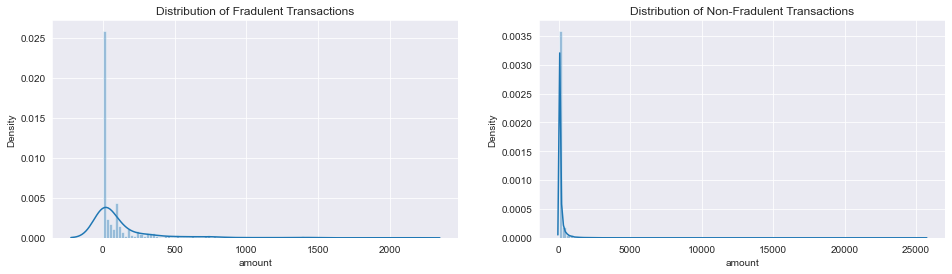

In [13]:
# lets now find the distirbution of amounts for the Fradulent and Non Fradulent Transactions
sns.set_style("darkgrid")
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df[df['class'] ==1]['amount'], bins = 100)
plt.title("Distribution of Fradulent Transactions")

plt.subplot(1,2,2)
sns.distplot(df[df['class'] ==0]['amount'], bins = 100)
plt.title("Distribution of Non-Fradulent Transactions")
plt.show();

From the above graph we can see that most of fraud amount is less than 500. Also, the fraud transactions are very close to 0.

In [14]:
# lets now find out the most commonly occurring fraudulent, non fradulent transactions
# and also the mimimum and maximum amount for each of these types
print("Common Fradulent Transaction Amount: \n",df[df['class'] == 1]['amount'].value_counts().head())
print("\n")
print("Maximum Fradulent Transaction Amount: ",df[df['class'] == 1]['amount'].max())
print("Minimum Fradulent Transaction Amount: ",df[df['class'] == 1]['amount'].min())
print("\n\n")

print("Common Non-Fradulent Transaction Amount: \n",df[df['class'] == 0]['amount'].value_counts().head())
print("\n")
print("Maximum Non-Fradulent Transaction Amount: ",df[df['class'] == 0]['amount'].max())
print("Minimum Non-Fradulent Transaction Amount: ",df[df['class'] == 0]['amount'].min())

Common Fradulent Transaction Amount: 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: amount, dtype: int64


Maximum Fradulent Transaction Amount:  2125.87
Minimum Fradulent Transaction Amount:  0.0



Common Non-Fradulent Transaction Amount: 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: amount, dtype: int64


Maximum Non-Fradulent Transaction Amount:  25691.16
Minimum Non-Fradulent Transaction Amount:  0.0


#### Highlights:
1. Amount of 1 is the most common fradulent transaction.
2. Minimum amount of fradulent transaction is 0
3. Maximum amount of fradulent transaction is 2125.87
4. Interesting point to observe here is that the amount of 0 has occurred 27 times as fradulent trasactions. This actually means that the fraudsters are doing any monetary transactions but trying to get the details of the card.

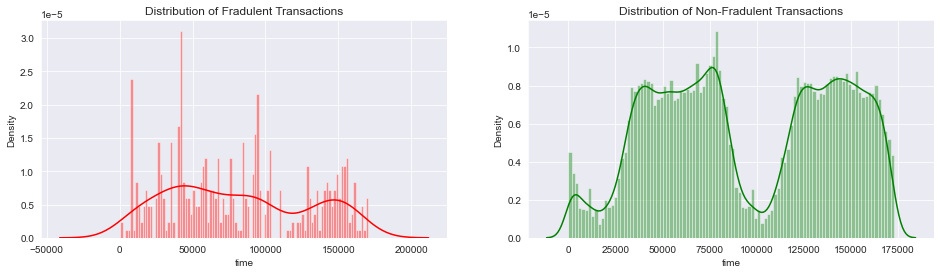

In [15]:
# lets now find the distirbution of time for the Fradulent and Non Fradulent Transactions
sns.set_style("darkgrid")
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df[df['class'] ==1]['time'], color = 'red', bins = 100)
plt.title("Distribution of Fradulent Transactions")

plt.subplot(1,2,2)
sns.distplot(df[df['class'] ==0]['time'], color = 'green', bins = 100)
plt.title("Distribution of Non-Fradulent Transactions")
plt.show();

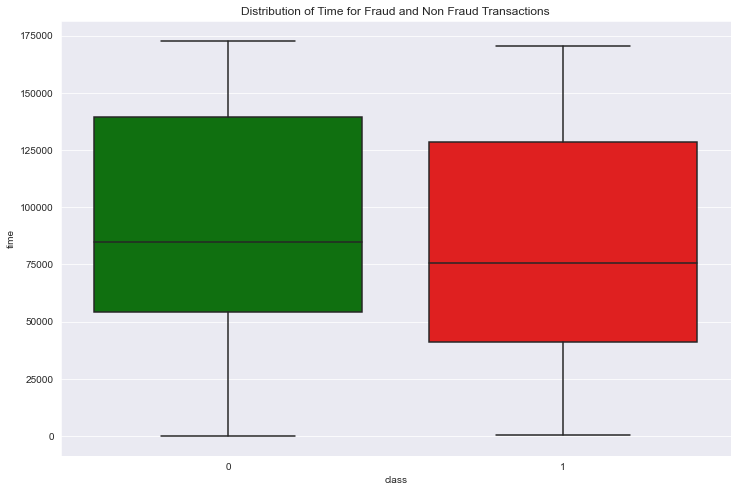

In [16]:
#lets plot a boxplot for Time Distribution wrt Transaction Types
plt.figure(figsize=(12,8))
col = {0:"g", 1:"r"}
sns.boxplot(x = 'class', y = 'time', data = df, palette = col)
plt.title("Distribution of Time for Fraud and Non Fraud Transactions")
plt.show();

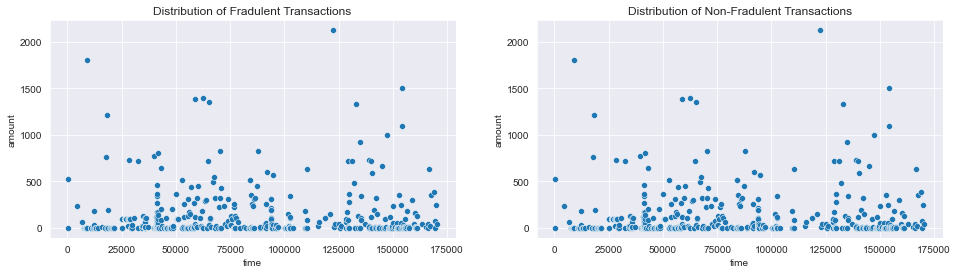

In [17]:
# lets now plot a scatter plot for distribution of amount for the Fradulent and Non Fradulent Transactions
sns.set_style("darkgrid")
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.scatterplot(x = "time", y = "amount", data = df[df["class"] == 1])
plt.title("Distribution of Fradulent Transactions")

plt.subplot(1,2,2)
sns.scatterplot(x = "time", y = "amount", data = df[df["class"] == 1])
plt.title("Distribution of Non-Fradulent Transactions")
plt.show();

In [18]:
#correlation among explanatory variables
df[["time","amount","class"]].corr()["class"]

time     -0.012323
amount    0.005632
class     1.000000
Name: class, dtype: float64

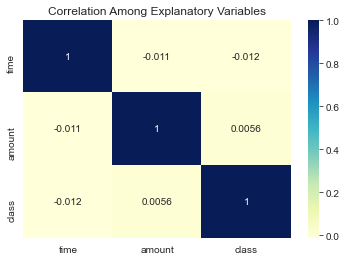

In [19]:
#graphically visualizing the above correlation
sns.heatmap(df[["time","amount","class"]].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Among Explanatory Variables")
plt.show();

#### Feature Engineering

In [20]:
# Feature enginerring on the time variable
# converting time from seconds to hours
df['time'] = df['time'].apply(lambda sec: (sec/3600))

In [21]:
#lets now calculate the hour of the day
df['hour'] = df['time'] % 24
df['hour'] = df['hour'].apply(lambda x: math.floor(x))

In [22]:
#calculating the first and second day
df['day'] = df['time']/24
df['day'] = df['day'].apply(lambda x : 1 if (x==0) else math.ceil(x))

In [23]:
df[['time', 'hour', 'day', 'amount', 'class']]

,time,hour,day,amount,class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
284802,47.996111,23,2,0.77,0
284803,47.996389,23,2,24.79,0
284804,47.996667,23,2,67.88,0
284805,47.996667,23,2,10.00,0


In [24]:
#lets now find the fraud and genuine transactions day wise
#calculating the total transactions day wise
day_tran = df['day'].value_counts()

#calculating fradulent transactions day wise
day_fraud_tran = df[(df['class'] == 1)]['day'].value_counts()

#calculating non fraudulent transactions daywise
day_nonfraud_tran = df[(df['class'] == 0)]['day'].value_counts()

In [25]:
print("Total Transactions Day Wise")
print(day_tran)
print("\n")

print("Fradulent Transactions Day Wise")
print(day_fraud_tran)
print("\n")

print("Non Fradulent Transactions Day Wise")
print(day_nonfraud_tran)
print("\n")

print("Percentage of Fraud Transcations day wise")
print((day_fraud_tran/day_tran)*100)

Total Transactions Day Wise
1    144787
2    140020
Name: day, dtype: int64


Fradulent Transactions Day Wise
1    281
2    211
Name: day, dtype: int64


Non Fradulent Transactions Day Wise
1    144506
2    139809
Name: day, dtype: int64


Percentage of Fraud Transcations day wise
1    0.194078
2    0.150693
Name: day, dtype: float64


#### Highlights

1. Total number of transaction on Day 1 was 144787, out of which 281 was a fraud and 144506 was genuine. Fraud transaction was 0.19% of the total transaction on day 1.

2. Total number of transaction on Day 2 was 140020, out of which 211 was a fraud and 139809 was genuine. Fraud transaction was 0.15% of the total transaction on day 2.

3. Most of the transaction including the fraud transaction happened on day 1.

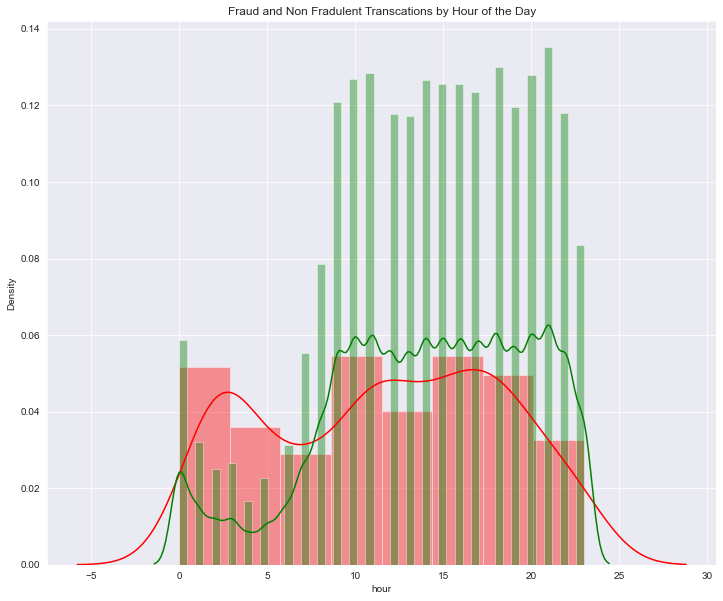

In [26]:
#lets see if we find any pattern between hour of the day and the transactions
plt.figure(figsize=(12,10))

sns.distplot(df[df['class']==1]["hour"], color = "red")
sns.distplot(df[df['class']==0]["hour"], color = "green")
plt.title("Fraud and Non Fradulent Transcations by Hour of the Day")
plt.show();

From the above plot we can observe the following:

1. Most of the fradulent transactions happen between 0 to 5 hours when most of the people are not awake.
2. The non fraudulent transactions happen between 10 and 21 hours when there is a lot of business activity.

In [27]:
#lets now check for any unsual patterns or skewness in data
skewness = df.skew(axis = 0)
print(skewness)

time      -0.035568
v1        -3.280667
v2        -4.624866
v3        -2.240155
v4         0.676292
v5        -2.425901
v6         1.826581
v7         2.553907
v8        -8.521944
v9         0.554680
v10        1.187141
v11        0.356506
v12       -2.278401
v13        0.065233
v14       -1.995176
v15       -0.308423
v16       -1.100966
v17       -3.844914
v18       -0.259880
v19        0.109192
v20       -2.037155
v21        3.592991
v22       -0.213258
v23       -5.875140
v24       -0.552499
v25       -0.415793
v26        0.576693
v27       -1.170209
v28       11.192091
amount    16.977724
class     23.997579
hour      -0.490470
day        0.033480
dtype: float64


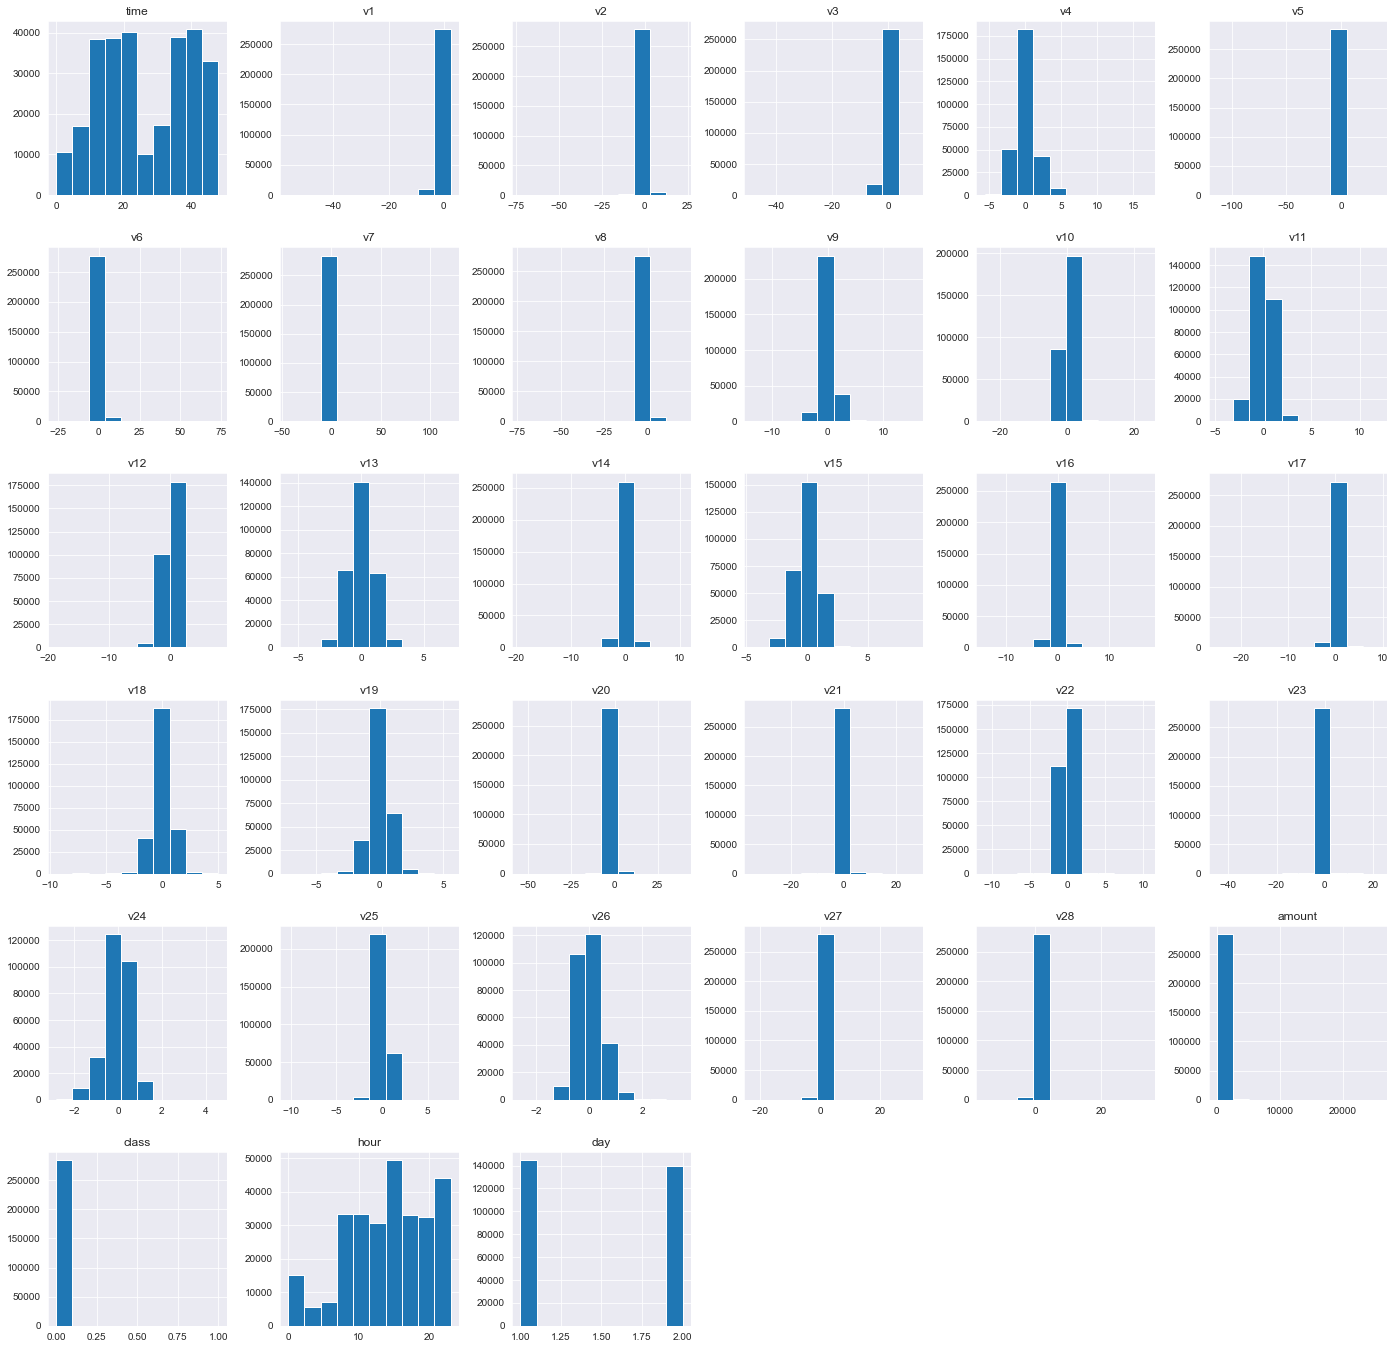

In [28]:
#lets plot a histogram to visualize the skewness
df.hist(figsize=(24,24))
plt.show();

From the above we can notice that the amount variable which is a non transformed variable seems to be slightly skewed.

In [29]:
#lets now apply the power transform on the amount variable
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

df['amount_tr'] = scaler.fit_transform(df['amount'].values.reshape(-1,1))

In [30]:
#printing the head of our dataframe
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class,hour,day,amount_tr
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1,1.119013
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1,-1.128464
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1,1.623286
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1,1.012504
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1,0.692981


In [31]:
#checking the skewness now of our dataframe
df.skew()

time         -0.035568
v1           -3.280667
v2           -4.624866
v3           -2.240155
v4            0.676292
v5           -2.425901
v6            1.826581
v7            2.553907
v8           -8.521944
v9            0.554680
v10           1.187141
v11           0.356506
v12          -2.278401
v13           0.065233
v14          -1.995176
v15          -0.308423
v16          -1.100966
v17          -3.844914
v18          -0.259880
v19           0.109192
v20          -2.037155
v21           3.592991
v22          -0.213258
v23          -5.875140
v24          -0.552499
v25          -0.415793
v26           0.576693
v27          -1.170209
v28          11.192091
amount       16.977724
class        23.997579
hour         -0.490470
day           0.033480
amount_tr     0.018354
dtype: float64

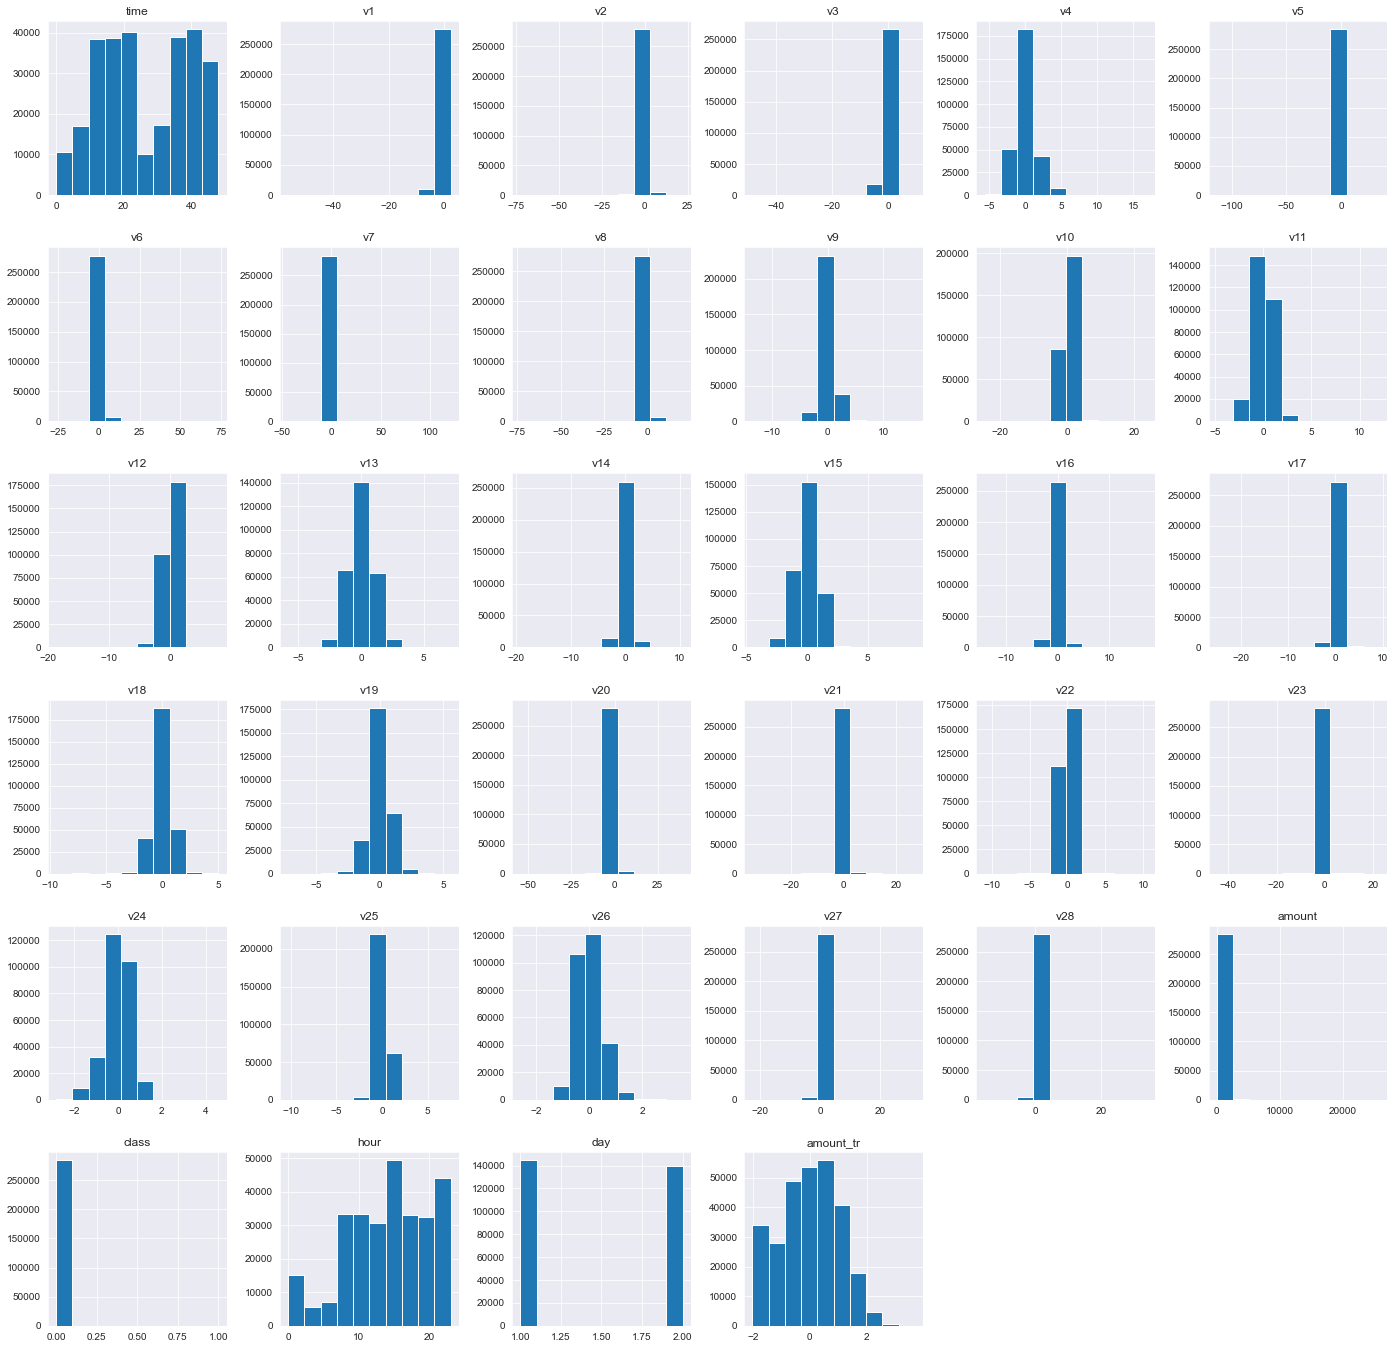

In [32]:
#visuilaizing the skewness now with the help of histogram
df.hist(figsize=(24,24))
plt.show();

### Splitting into Train and Test Data

In [33]:
#lets first check the columns of our dataframe
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class', 'hour', 'day', 'amount_tr'],
      dtype='object')

In [34]:
X = df.drop(["time", "hour", "day", "class", "amount"], axis = 1)
y= df["class"]

In [35]:
# checking the columns in predictor variables
X.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount_tr'],
      dtype='object')

In [36]:
#printing the values of X
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount_tr
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.119013
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.128464
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.623286
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.012504
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.692981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-1.619788
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.096295
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.675590
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.427298


In [37]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 102)

In [38]:
#displaying the shpae of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364,)
(85443,)


### Model Building

#### Classifiers that we will use:
1. Logistic Regression
2. Support Vector Classifer
3. Decision Tree Classifier
4. Random Forest Classifier
5. XGBoost Classfier

#### Techniques that will be used for above classifiers
1. Imablanced Dataset
2. Random Oversampling
3. SMOTE
4. ADASYN
5. NearMiss

In [39]:
#importing the required packages for model building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [40]:
#empty list to store the names of our model
names_list = []

#empty list to store performance metrics of the train set
aucs_train_list = []
accuracy_train_list = []
precision_train_list = []
recall_train_list = []
f1_train_list = []

#empty list to store performance metrics of the test set
aucs_test_list = []
accuracy_test_list = []
precision_test_list = []
recall_test_list = []
f1_test_list = []

In [41]:
#creating the instance of the models that we will be creating

# Logistic regression
LR = LogisticRegression()

# Support vector classifier
SVM = SVC()

#Decision Tree Classifier
DT = DecisionTreeClassifier()

#Random Forest Calssifier
RF = RandomForestClassifier()

#XGBoost Classifier
XGB = XGBClassifier(eval_metric = 'logloss')

In [42]:
#parameters that will be used for hyperparameter tuning

#defining paraemeters for the logistic regression model
logistic_parameters = {"penalty": ['l1','l2'],
                       "C": np.logspace(-10, 1, 15),
                       'class_weight':[None, 'balanced']}

#defining parametets for the SVM Model
sv_parameters = {'C': list(np.linspace(0.1, 2.0, 10)),
                 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                 'degree': list(range(2, 6)),
                 'gamma': ['auto', 'scale'],
                 'tol': list(np.logspace(np.log(1e-5), np.log(1e-2), num = 10, base = 3)),
                 'max_iter': list(range(-1, 101))}

#defining parameters for the Decision Tree Model
dt_parameters = {"max_depth": [i for i in range(5,16,2)],
                 "min_samples_split":[2, 5, 10, 15, 20, 50, 100],
                 "min_samples_leaf":[1, 2, 5]}

#defining parameters for the Random Forest Model
rf_parameters = {"n_estimators": [2, 10, 30, 50, 100],
                 "max_depth": [i for i in range(5,16,2)],
                 "min_samples_split":[2, 5, 10, 15, 20, 50, 100]}

#deifing parameters for the XGBoost Model
xg_parameters = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
                 "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
                 "min_child_weight": [1, 3, 5, 7],
                 "gamma": [0.0, 0.1, 0.2 , 0.3, 0.4],
                 "colsample_bytree": [0.3, 0.4, 0.5 , 0.7]}

In [43]:
#lets now define the cross validation parameter for randomized search cv
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 102)

In [44]:
#function to build and evaluate the performance of the model
def build_eval_model(models, cv = cv):
    plt.figure(figsize=(12,6))

    for name, X_train, y_train, X_test, y_test, parameters, estimator in models:
        
        names_list.append(name)
        
        #doing a randomized search cv for hyper parameter tuning
        model = RandomizedSearchCV(estimator = estimator, param_distributions = parameters, cv = cv, 
                             scoring = 'f1', n_jobs = -1,random_state = 102, verbose = 2)
        

        # Build model
        model.fit(X_train, y_train)
        
        #finding the optimal hyper parameters
        print("Best Hyperparameter for " + name + " Model:", model.best_estimator_)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_list.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_list.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_list.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_list.append(Aucs_test)
        
        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_list.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_list.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_list.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_list.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_list.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_list.append(F1Score_test)
        
        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)
        
        # classification report
        class_report = metrics.classification_report(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        
        print('Classification Report : \n', class_report)
        print("\n")
        print("-"*120)
        print("-"*120)
        print("\n")
        
        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
        
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

#### Imbalanced Data

In [45]:
#building models with imbalanced data
imbalanced_models = []

imbalanced_models.append(('LR Imbalance', X_train, y_train, X_test, y_test, logistic_parameters, LR))
imbalanced_models.append(('SVM Imbalance', X_train, y_train, X_test, y_test, sv_parameters, SVM))
imbalanced_models.append(('Decsion Tree Imbalance', X_train, y_train, X_test, y_test, dt_parameters, DT))
imbalanced_models.append(('Random Forest Imbalance', X_train, y_train, X_test, y_test, rf_parameters, RF))
imbalanced_models.append(('XGBoost Imbalance', X_train, y_train, X_test, y_test, xg_parameters, XGB))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.3s finished


Best Hyperparameter for LR Imbalance Model: LogisticRegression(C=3.1622776601683795e-05, class_weight='balanced')
Model Name : LR Imbalance
Train Accuracy :0.98945
Test Accuracy :0.98933
Train AUC : 0.93511
Test AUC : 0.93426
Train Precision : 0.12505
Test Precision : 0.13385
Train Recall : 0.88060
Test Recall : 0.87898
Train F1 : 0.21901
Test F1 : 0.23232
Confusion Matrix : 
 [[84393   893]
 [   19   138]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85286
           1       0.13      0.88      0.23       157

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443



------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.3s finished


Best Hyperparameter for SVM Imbalance Model: SVC(C=1.577777777777778, degree=4, gamma='auto', max_iter=100,
    tol=4.03228151895543e-05)
Model Name : SVM Imbalance
Train Accuracy :0.99914
Test Accuracy :0.99891
Train AUC : 0.78202
Test AUC : 0.76104
Train Precision : 0.87907
Test Precision : 0.82000
Train Recall : 0.56418
Test Recall : 0.52229
Train F1 : 0.68727
Test F1 : 0.63813
Confusion Matrix : 
 [[85268    18]
 [   75    82]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.82      0.52      0.64       157

    accuracy                           1.00     85443
   macro avg       0.91      0.76      0.82     85443
weighted avg       1.00      1.00      1.00     85443



------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.3s finished


Best Hyperparameter for Decsion Tree Imbalance Model: DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=20)
Model Name : Decsion Tree Imbalance
Train Accuracy :0.99961
Test Accuracy :0.99953
Train AUC : 0.89997
Test AUC : 0.88851
Train Precision : 0.96057
Test Precision : 0.96063
Train Recall : 0.80000
Test Recall : 0.77707
Train F1 : 0.87296
Test F1 : 0.85915
Confusion Matrix : 
 [[85281     5]
 [   35   122]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.96      0.78      0.86       157

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


Best Hyperparameter for Random Forest Imbalance Model: RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=10)
Model Name : Random Forest Imbalance
Train Accuracy :0.99971
Test Accuracy :0.99954
Train AUC : 0.91939
Test AUC : 0.88851
Train Precision : 0.98596
Test Precision : 0.96825
Train Recall : 0.83881
Test Recall : 0.77707
Train F1 : 0.90645
Test F1 : 0.86219
Confusion Matrix : 
 [[85282     4]
 [   35   122]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.97      0.78      0.86       157

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.4min finished


Best Hyperparameter for XGBoost Imbalance Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
Model Name : XGBoost Imbalance
Train Accuracy :1.00000
Test Accuracy :0.99964
Train AUC : 1.00000
Test AUC : 0.90763
Train Precision : 1.00000
Test Precision : 0.98462
Train Recall : 1.00000
Test Recall : 0.81529
Train F1 : 1.00000
Test F1 : 0.89199
Confusion Matrix : 
 [[85284     2]
 [   29   128]]
Classification Report : 
        

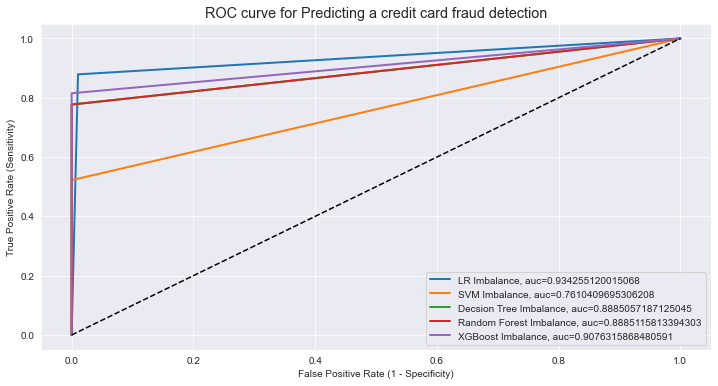

In [46]:
#calling the function build_measure_model to start the model building
build_eval_model(imbalanced_models, cv = cv)

#### Random Oversampling

In [47]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

print("Shape of original dataset %s"% Counter(y_train))

ros = RandomOverSampler(random_state = 102)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("Shape of resampled dataset %s"% Counter(y_train_ros))

Shape of original dataset Counter({0: 199029, 1: 335})
Shape of resampled dataset Counter({0: 199029, 1: 199029})


In [48]:
#building models with oversampled data
oversampled_models = []

oversampled_models.append(('LR Oversampled', X_train_ros, y_train_ros, X_test, y_test, logistic_parameters, LR))
oversampled_models.append(('SVM Oversampled', X_train_ros, y_train_ros, X_test, y_test, sv_parameters, SVM))
oversampled_models.append(('Decsion Tree Oversampled', X_train_ros, y_train_ros, X_test, y_test, dt_parameters, DT))
oversampled_models.append(('Random Forest Oversampled', X_train_ros, y_train_ros, X_test, y_test, rf_parameters, RF))
oversampled_models.append(('XGBoost Oversampled', X_train_ros, y_train_ros, X_test, y_test, xg_parameters, XGB))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.3s finished


Best Hyperparameter for LR Oversampled Model: LogisticRegression(C=3.1622776601683795e-05)
Model Name : LR Oversampled
Train Accuracy :0.93827
Test Accuracy :0.98669
Train AUC : 0.93827
Test AUC : 0.93929
Train Precision : 0.98539
Test Precision : 0.11111
Train Recall : 0.88973
Test Recall : 0.89172
Train F1 : 0.93512
Test F1 : 0.19760
Confusion Matrix : 
 [[84166  1120]
 [   17   140]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85286
           1       0.11      0.89      0.20       157

    accuracy                           0.99     85443
   macro avg       0.56      0.94      0.60     85443
weighted avg       1.00      0.99      0.99     85443



------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


Fitting 5 f

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.2s finished


Best Hyperparameter for SVM Oversampled Model: SVC(C=1.788888888888889, degree=4, kernel='linear', max_iter=1,
    tol=9.370331199809215e-05)
Model Name : SVM Oversampled
Train Accuracy :0.63390
Test Accuracy :0.37118
Train AUC : 0.63390
Test AUC : 0.61508
Train Precision : 0.58752
Test Precision : 0.00251
Train Recall : 0.89889
Test Recall : 0.85987
Train F1 : 0.71059
Test F1 : 0.00500
Confusion Matrix : 
 [[31580 53706]
 [   22   135]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.37      0.54     85286
           1       0.00      0.86      0.01       157

    accuracy                           0.37     85443
   macro avg       0.50      0.62      0.27     85443
weighted avg       1.00      0.37      0.54     85443



------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Best Hyperparameter for Decsion Tree Oversampled Model: DecisionTreeClassifier(max_depth=15, min_samples_leaf=2)
Model Name : Decsion Tree Oversampled
Train Accuracy :0.99856
Test Accuracy :0.99650
Train AUC : 0.99856
Test AUC : 0.89652
Train Precision : 0.99712
Test Precision : 0.31888
Train Recall : 1.00000
Test Recall : 0.79618
Train F1 : 0.99856
Test F1 : 0.45537
Confusion Matrix : 
 [[85019   267]
 [   32   125]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.32      0.80      0.46       157

    accuracy                           1.00     85443
   macro avg       0.66      0.90      0.73     85443
weighted avg       1.00      1.00      1.00     85443



------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.7min finished


Best Hyperparameter for Random Forest Oversampled Model: RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=10)
Model Name : Random Forest Oversampled
Train Accuracy :0.99992
Test Accuracy :0.99938
Train AUC : 0.99992
Test AUC : 0.89161
Train Precision : 0.99985
Test Precision : 0.86620
Train Recall : 1.00000
Test Recall : 0.78344
Train F1 : 0.99992
Test F1 : 0.82274
Confusion Matrix : 
 [[85267    19]
 [   34   123]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.87      0.78      0.82       157

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.5min finished


Best Hyperparameter for XGBoost Oversampled Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0.3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=6, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
Model Name : XGBoost Oversampled
Train Accuracy :0.99998
Test Accuracy :0.99952
Train AUC : 0.99998
Test AUC : 0.92029
Train Precision : 0.99996
Test Precision : 0.89189
Train Recall : 1.00000
Test Recall : 0.84076
Train F1 : 0.99998
Test F1 : 0.86557
Confusion Matrix : 
 [[85270    16]
 [   25   132]]
Classification Report : 
    

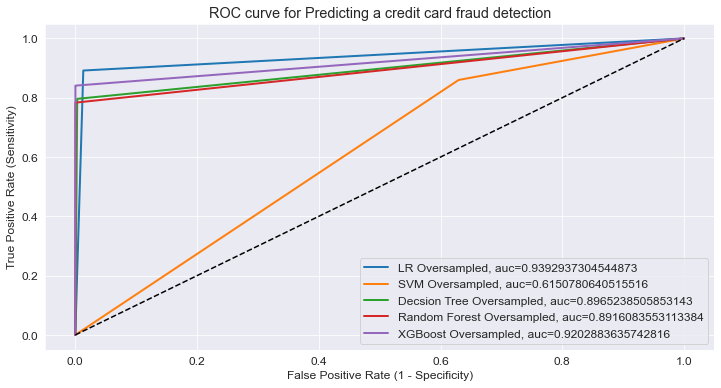

In [49]:
#calling the function build_measure_model to start the model building
build_eval_model(oversampled_models, cv = cv)

#### Balancing the Dataset Using SMOTE

In [50]:
from imblearn.over_sampling import SMOTE

print("Shape of original dataset %s"% Counter(y_train))

sm = SMOTE(random_state = 102)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Shape of resampled dataset %s"% Counter(y_train_sm))

Shape of original dataset Counter({0: 199029, 1: 335})
Shape of resampled dataset Counter({0: 199029, 1: 199029})


In [51]:
#buidling models with the dataset balanced by SMOTE
smote_models = []

smote_models.append(('LR SMOTE', X_train_sm, y_train_sm, X_test, y_test, logistic_parameters, LR))
smote_models.append(('SVM SMOTE', X_train_sm, y_train_sm, X_test, y_test, sv_parameters, SVM))
smote_models.append(('Decsion Tree SMOTE', X_train_sm, y_train_sm, X_test, y_test, dt_parameters, DT))
smote_models.append(('Random Forest SMOTE', X_train_sm, y_train_sm, X_test, y_test, rf_parameters, RF))
smote_models.append(('XGBoost SMOTE', X_train_sm, y_train_sm, X_test, y_test, xg_parameters, XGB))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.2s finished


Best Hyperparameter for LR SMOTE Model: LogisticRegression(C=3.1622776601683795e-05)
Model Name : LR SMOTE
Train Accuracy :0.93476
Test Accuracy :0.98566
Train AUC : 0.93476
Test AUC : 0.93878
Train Precision : 0.98414
Test Precision : 0.10386
Train Recall : 0.88375
Test Recall : 0.89172
Train F1 : 0.93125
Test F1 : 0.18605
Confusion Matrix : 
 [[84078  1208]
 [   17   140]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85286
           1       0.10      0.89      0.19       157

    accuracy                           0.99     85443
   macro avg       0.55      0.94      0.59     85443
weighted avg       1.00      0.99      0.99     85443



------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


Fitting 5 folds for eac

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.2s finished


Best Hyperparameter for SVM SMOTE Model: SVC(C=1.788888888888889, degree=4, kernel='linear', max_iter=1,
    tol=9.370331199809215e-05)
Model Name : SVM SMOTE
Train Accuracy :0.58971
Test Accuracy :0.20164
Train AUC : 0.58971
Test AUC : 0.57148
Train Precision : 0.55045
Test Precision : 0.00217
Train Recall : 0.97878
Test Recall : 0.94268
Train F1 : 0.70463
Test F1 : 0.00432
Confusion Matrix : 
 [[17081 68205]
 [    9   148]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.20      0.33     85286
           1       0.00      0.94      0.00       157

    accuracy                           0.20     85443
   macro avg       0.50      0.57      0.17     85443
weighted avg       1.00      0.20      0.33     85443



------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


Best Hyperparameter for Decsion Tree SMOTE Model: DecisionTreeClassifier(max_depth=15, min_samples_leaf=2)
Model Name : Decsion Tree SMOTE
Train Accuracy :0.99684
Test Accuracy :0.99291
Train AUC : 0.99684
Test AUC : 0.90426
Train Precision : 0.99444
Test Precision : 0.18156
Train Recall : 0.99926
Test Recall : 0.81529
Train F1 : 0.99684
Test F1 : 0.29698
Confusion Matrix : 
 [[84709   577]
 [   29   128]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85286
           1       0.18      0.82      0.30       157

    accuracy                           0.99     85443
   macro avg       0.59      0.90      0.65     85443
weighted avg       1.00      0.99      1.00     85443



------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.5min finished


Best Hyperparameter for Random Forest SMOTE Model: RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=10)
Model Name : Random Forest SMOTE
Train Accuracy :0.99929
Test Accuracy :0.99865
Train AUC : 0.99929
Test AUC : 0.91668
Train Precision : 0.99918
Test Precision : 0.59545
Train Recall : 0.99940
Test Recall : 0.83439
Train F1 : 0.99929
Test F1 : 0.69496
Confusion Matrix : 
 [[85197    89]
 [   26   131]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.60      0.83      0.69       157

    accuracy                           1.00     85443
   macro avg       0.80      0.92      0.85     85443
weighted avg       1.00      1.00      1.00     85443



------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.0min finished


Best Hyperparameter for XGBoost SMOTE Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0.3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=8, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
Model Name : XGBoost SMOTE
Train Accuracy :0.99999
Test Accuracy :0.99937
Train AUC : 0.99999
Test AUC : 0.92657
Train Precision : 0.99998
Test Precision : 0.81212
Train Recall : 1.00000
Test Recall : 0.85350
Train F1 : 0.99999
Test F1 : 0.83230
Confusion Matrix : 
 [[85255    31]
 [   23   134]]
Classification Report : 
               pr

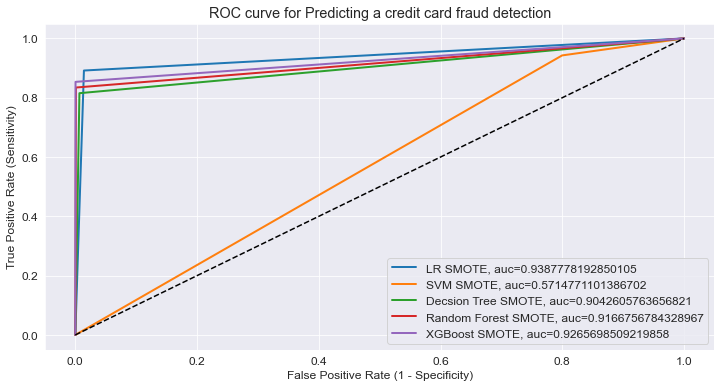

In [52]:
#calling the function build_measure_model to start the model building
build_eval_model(smote_models, cv = cv)

#### Balancing the Dataset Using ADASYN

In [53]:
from imblearn.over_sampling import ADASYN

print("Shape of original dataset %s"% Counter(y_train))

ada = ADASYN(random_state = 102)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

print("Shape of resampled dataset %s"% Counter(y_train_ada))

Shape of original dataset Counter({0: 199029, 1: 335})
Shape of resampled dataset Counter({0: 199029, 1: 199026})


In [54]:
#buidling models with the dataset balanced by ADASYN
adasyn_models = []

adasyn_models.append(('LR Adasyn', X_train_ada, y_train_ada, X_test, y_test, logistic_parameters, LR))
adasyn_models.append(('SVM Adasyn', X_train_ada, y_train_ada, X_test, y_test, sv_parameters, SVM))
adasyn_models.append(('Decsion Tree Adasyn', X_train_ada, y_train_ada, X_test, y_test, dt_parameters, DT))
adasyn_models.append(('Random Forest Adasyn', X_train_ada, y_train_ada, X_test, y_test, rf_parameters, RF))
adasyn_models.append(('XGBoost Adasyn', X_train_ada, y_train_ada, X_test, y_test, xg_parameters, XGB))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.9s finished


Best Hyperparameter for LR Adasyn Model: LogisticRegression(C=3.1622776601683795e-05)
Model Name : LR Adasyn
Train Accuracy :0.88816
Test Accuracy :0.93408
Train AUC : 0.88816
Test AUC : 0.92248
Train Precision : 0.92837
Test Precision : 0.02482
Train Recall : 0.84123
Test Recall : 0.91083
Train F1 : 0.88265
Test F1 : 0.04833
Confusion Matrix : 
 [[79668  5618]
 [   14   143]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97     85286
           1       0.02      0.91      0.05       157

    accuracy                           0.93     85443
   macro avg       0.51      0.92      0.51     85443
weighted avg       1.00      0.93      0.96     85443



------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


Fitting 5 folds for e

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.0s finished


Best Hyperparameter for SVM Adasyn Model: SVC(C=1.788888888888889, degree=4, kernel='linear', max_iter=1,
    tol=9.370331199809215e-05)
Model Name : SVM Adasyn
Train Accuracy :0.58172
Test Accuracy :0.19931
Train AUC : 0.58172
Test AUC : 0.57031
Train Precision : 0.54626
Test Precision : 0.00216
Train Recall : 0.96502
Test Recall : 0.94268
Train F1 : 0.69762
Test F1 : 0.00431
Confusion Matrix : 
 [[16882 68404]
 [    9   148]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.20      0.33     85286
           1       0.00      0.94      0.00       157

    accuracy                           0.20     85443
   macro avg       0.50      0.57      0.17     85443
weighted avg       1.00      0.20      0.33     85443



------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


Best Hyperparameter for Decsion Tree Adasyn Model: DecisionTreeClassifier(max_depth=15, min_samples_leaf=2)
Model Name : Decsion Tree Adasyn
Train Accuracy :0.99040
Test Accuracy :0.97945
Train AUC : 0.99040
Test AUC : 0.91023
Train Precision : 0.98146
Test Precision : 0.07085
Train Recall : 0.99968
Test Recall : 0.84076
Train F1 : 0.99049
Test F1 : 0.13069
Confusion Matrix : 
 [[83555  1731]
 [   25   132]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85286
           1       0.07      0.84      0.13       157

    accuracy                           0.98     85443
   macro avg       0.54      0.91      0.56     85443
weighted avg       1.00      0.98      0.99     85443



------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.8min finished


Best Hyperparameter for Random Forest Adasyn Model: RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=10)
Model Name : Random Forest Adasyn
Train Accuracy :0.99826
Test Accuracy :0.99579
Train AUC : 0.99826
Test AUC : 0.92160
Train Precision : 0.99655
Test Precision : 0.28358
Train Recall : 0.99999
Test Recall : 0.84713
Train F1 : 0.99827
Test F1 : 0.42492
Confusion Matrix : 
 [[84950   336]
 [   24   133]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.28      0.85      0.42       157

    accuracy                           1.00     85443
   macro avg       0.64      0.92      0.71     85443
weighted avg       1.00      1.00      1.00     85443



------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 16.8min finished


Best Hyperparameter for XGBoost Adasyn Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=8, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
Model Name : XGBoost Adasyn
Train Accuracy :0.99999
Test Accuracy :0.99931
Train AUC : 0.99999
Test AUC : 0.92018
Train Precision : 0.99998
Test Precision : 0.79518
Train Recall : 1.00000
Test Recall : 0.84076
Train F1 : 0.99999
Test F1 : 0.81734
Confusion Matrix : 
 [[85252    34]
 [   25   132]]
Classification Report : 
               

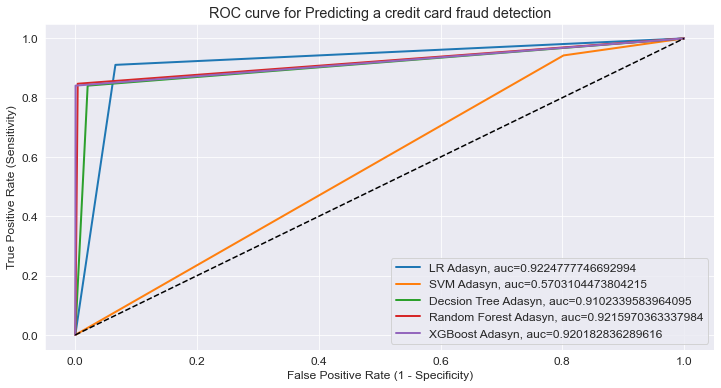

In [55]:
#calling the function build_measure_model to start the model building
build_eval_model(adasyn_models, cv = cv)

#### Balancing the Dataset using NearMiss

In [56]:
from imblearn.under_sampling import NearMiss

print("Shape of original dataset %s"% Counter(y_train))

nm = NearMiss()
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

print("Shape of resampled dataset %s"% Counter(y_train_nm))

Shape of original dataset Counter({0: 199029, 1: 335})
Shape of resampled dataset Counter({0: 335, 1: 335})


In [57]:
#buidling models with the dataset balanced by NearMiss
nm_models = []

nm_models.append(('LR NearMiss', X_train_nm, y_train_nm, X_test, y_test, logistic_parameters, LR))
nm_models.append(('SVM NearMiss', X_train_nm, y_train_nm, X_test, y_test, sv_parameters, SVM))
nm_models.append(('Decsion Tree NearMiss', X_train_nm, y_train_nm, X_test, y_test, dt_parameters, DT))
nm_models.append(('Random Forest NearMiss', X_train_nm, y_train_nm, X_test, y_test, rf_parameters, RF))
nm_models.append(('XGBoost NearMiss', X_train_nm, y_train_nm, X_test, y_test, xg_parameters, XGB))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameter for LR NearMiss Model: LogisticRegression(C=3.1622776601683795e-05)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


Model Name : LR NearMiss
Train Accuracy :0.88806
Test Accuracy :0.99932
Train AUC : 0.88806
Test AUC : 0.88204
Train Precision : 1.00000
Test Precision : 0.85106
Train Recall : 0.77612
Test Recall : 0.76433
Train F1 : 0.87395
Test F1 : 0.80537
Confusion Matrix : 
 [[85265    21]
 [   37   120]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.85      0.76      0.81       157

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameter for SVM NearMiss Model: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


Model Name : SVM NearMiss
Train Accuracy :0.97910
Test Accuracy :0.14042
Train AUC : 0.97910
Test AUC : 0.56624
Train Precision : 0.99083
Test Precision : 0.00212
Train Recall : 0.96716
Test Recall : 0.99363
Train F1 : 0.97885
Test F1 : 0.00423
Confusion Matrix : 
 [[11842 73444]
 [    1   156]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.14      0.24     85286
           1       0.00      0.99      0.00       157

    accuracy                           0.14     85443
   macro avg       0.50      0.57      0.12     85443
weighted avg       1.00      0.14      0.24     85443



------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameter for Decsion Tree NearMi

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


Model Name : Decsion Tree NearMiss
Train Accuracy :0.98955
Test Accuracy :0.48085
Train AUC : 0.98955
Test AUC : 0.70816
Train Precision : 0.99697
Test Precision : 0.00330
Train Recall : 0.98209
Test Recall : 0.93631
Train F1 : 0.98947
Test F1 : 0.00658
Confusion Matrix : 
 [[40938 44348]
 [   10   147]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.48      0.65     85286
           1       0.00      0.94      0.01       157

    accuracy                           0.48     85443
   macro avg       0.50      0.71      0.33     85443
weighted avg       1.00      0.48      0.65     85443



------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


Best Hyperparameter for Random Forest NearMiss Model: RandomForestClassifier(max_depth=7, min_samples_split=50, n_estimators=50)
Model Name : Random Forest NearMiss
Train Accuracy :0.97612
Test Accuracy :0.11738
Train AUC : 0.97612
Test AUC : 0.55152
Train Precision : 0.96501
Test Precision : 0.00205
Train Recall : 0.98806
Test Recall : 0.98726
Train F1 : 0.97640
Test F1 : 0.00409
Confusion Matrix : 
 [[ 9874 75412]
 [    2   155]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.12      0.21     85286
           1       0.00      0.99      0.00       157

    accuracy                           0.12     85443
   macro avg       0.50      0.55      0.11     85443
weighted avg       1.00      0.12      0.21     85443



------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


Best Hyperparameter for XGBoost NearMiss Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
Model Name : XGBoost NearMiss
Train Accuracy :1.00000
Test Accuracy :0.27820
Train AUC : 1.00000
Test AUC : 0.62890
Train Precision : 1.00000
Test Precision : 0.00249
Train Recall : 1.00000
Test Recall : 0.98089
Train F1 : 1.00000
Test F1 : 0.00497
Confusion Matrix : 
 [[23616 61670]
 [    3   154]]
Classification Report : 
          

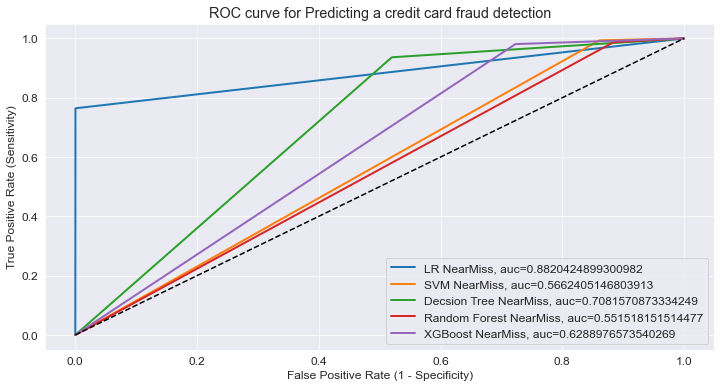

In [58]:
#calling the function build_measure_model to start the model building
build_eval_model(nm_models, cv = cv)

#### Performance of Various Classifiers

In [59]:
data = {'Model':names_list,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_list,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_list,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_list,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_list,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_list}

In [60]:
perf_df = pd.DataFrame(data)
perf_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'], ascending  = False)

,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test
4,XGBoost Imbalance,0.999637,0.907632,0.984615,0.815287,0.891986
9,XGBoost Oversampled,0.999520,0.920288,0.891892,0.840764,0.865574
3,Random Forest Imbalance,0.999544,0.888512,0.968254,0.777070,0.862191
2,Decsion Tree Imbalance,0.999532,0.888506,0.960630,0.777070,0.859155
14,XGBoost SMOTE,0.999368,0.926570,0.812121,0.853503,0.832298
8,Random Forest Oversampled,0.999380,0.891608,0.866197,0.783439,0.822742
19,XGBoost Adasyn,0.999309,0.920183,0.795181,0.840764,0.817337
20,LR NearMiss,0.999321,0.882042,0.851064,0.764331,0.805369
13,Random Forest SMOTE,0.998654,0.916676,0.595455,0.834395,0.694960
1,SVM Imbalance,0.998912,0.761041,0.820000,0.522293,0.638132


The above tables gies the summary of the performance metrics various classsifiers

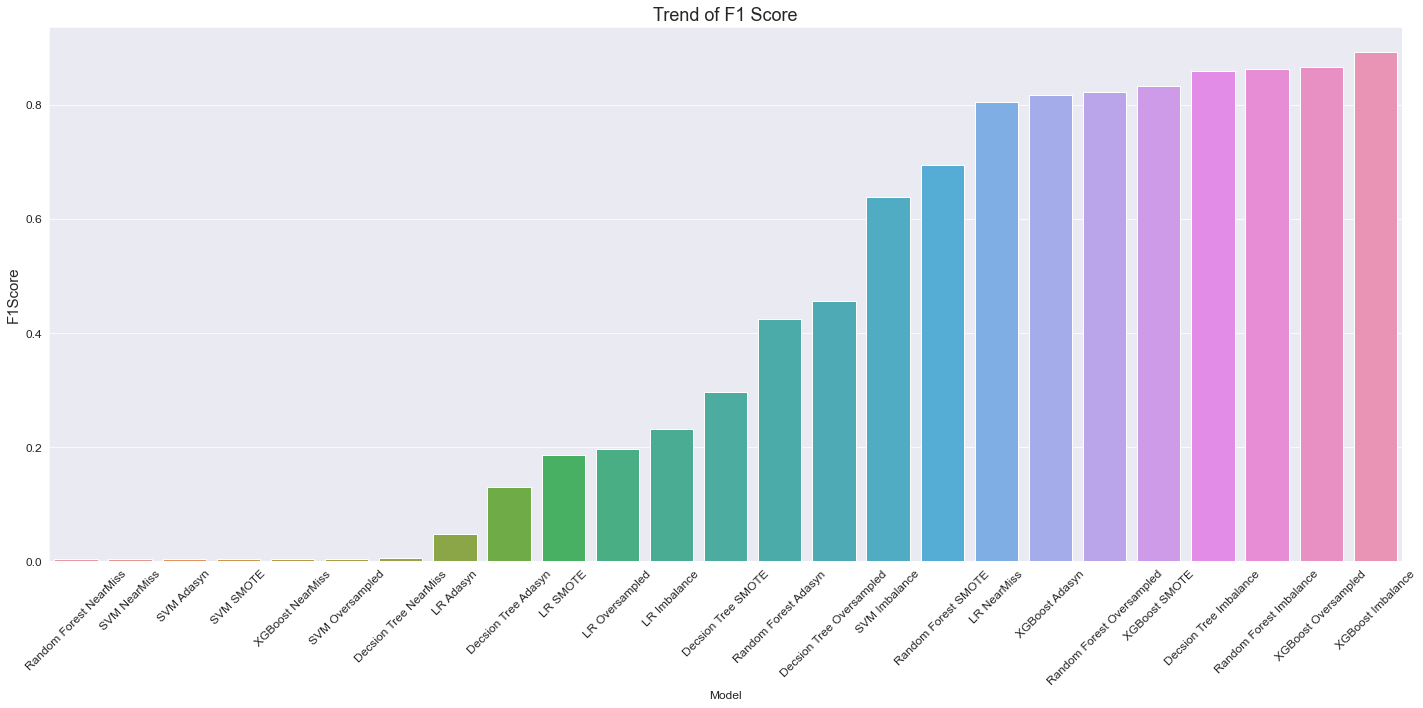

In [61]:
#visualizing the trend of F1 scores
plt.figure(figsize=(20,10))
#making a barplot and sorting the bars
sns.barplot(x='Model',
            y="F1Score_Test", 
            data=perf_df, 
            order=perf_df.sort_values('F1Score_Test').Model)
# set labels
plt.xlabel("Model")
plt.xticks(rotation = 45)
plt.ylabel("F1Score", size=15)
plt.title("Trend of F1 Score", size=18)
plt.tight_layout()
plt.show()

After training each of the models, these are the final results. All of the scores for XGBoost with Imbalanced Data and the XGBoost with Oversampled technique models are very promising for our dataset! Each model has a high true positive rate and a low false-positive rate, which is exactly what we’re looking for.

In the ROC graph above, the AUC scores for XGBoost with Oversampled technique is pretty high, which is what we’d like to see. As we move further right along the curve, we both capture more True Positives but also incur more False Positives. This means we capture more fraudulent transactions, but also flag even more normal transactions as fraudulent.   So XGBoost with Oversampled technique is our final model, as this gives highest F1 score of 86.55% on test datasets.